# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/KevQuant/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


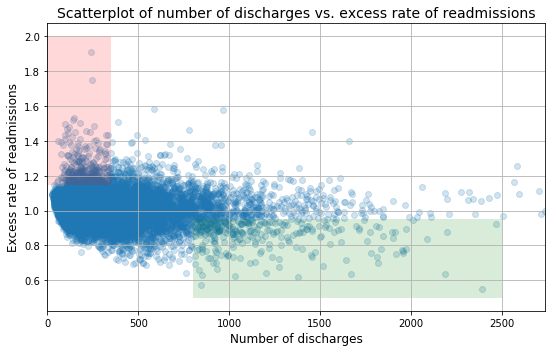

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01 (i.e. significance level). 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

Ans:
No. I do not agree with the above statistics analysis. The reason is that the Red (i.e. discharges < 100) and Green (i.e. discharges > 1000) area seems including a portion of outliers. The main proportion of data points in the scatterplot concentrates in the range 100 < discharge < 1000. For this reason, I would propose to perform a Hypotheses test to determine whether the number of discharge correlates with the rate of readmissions. Then we are able to justify the recommendations based on the above result. 

### B. Hypotheses Test : 

# So that now we first set up our hypotheses

- Null Hypothesis H0: the number of discharge NOT correlates with the rate of readmissions.
- Alt. Hypothesis Ha: the number of discharge correlates with the rate of readmissions.

**Hypotheses Test

Acccording to the following Hypotheses Test with (Z = -5) < -3 which means the p-value is more than 3 standard deviation below the mean. In other words, it shows more than 99.7% of chance the correlation of samples are not the same as the population mean. So that we have strong evidence to reject the Null Hypotheses and proves that the number of discharge correlates with the rate of readmissions. For this reason, I agree with the recommendation to upgrade the facilities with less than 300 discharges because less discharges may lead to higher readmission rate.


In [7]:
#Calculate pearson correlation function
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

#Calculate P-value function
def p_value(array, value):
    return (value - np.mean(array))/np.std(array)

In [8]:
df =  clean_hospital_read_df.copy()
print("Summary")
print("%d facilities with Discharge Rate > 1000"%(df["Number of Readmissions"][df["Number of Discharges"]>1000].shape))
print("%d facilities with Discharge Rate <100"%(df["Number of Readmissions"][df["Number of Discharges"]<100].shape))

a = df[(df["Number of Discharges"]>100)  & (df["Number of Discharges"]<1000)].shape[0]
print("%d facilities with Discharge Rate >100 and <1000"%(a))

Summary
463 facilities with Discharge Rate > 1000
1269 facilities with Discharge Rate <100
9810 facilities with Discharge Rate >100 and <1000


In [9]:
org_readmission_rate = df["Excess Readmission Ratio"][(df["Number of Discharges"]>100)  & (df["Number of Discharges"]<1000)]
org_discharge = df["Number of Discharges"][(df["Number of Discharges"]>100)  & (df["Number of Discharges"]<1000)]
print("Number of readmission rate data point: ",len(org_readmission_rate))
print("Number of discharge data point: ",len(org_discharge))

Number of readmission rate data point:  9810
Number of discharge data point:  9810


In [10]:
No_bootstrap_trial = len(org_readmission_rate)
coef_lst=[]
for i in range(No_bootstrap_trial):
    x  = np.random.permutation(org_readmission_rate)
    y  = np.random.permutation(org_discharge)
    coef_lst.append(np.corrcoef(x,y)[0,1])

org_coef = np.corrcoef(org_readmission_rate,org_discharge)
p_value(coef_lst, org_coef)

array([[ 100.45087093,   -5.64692868],
       [  -5.64692868,  100.45087093]])

### What are the advantages and disadvantages of using scatterplot to convey information?

With using the above scatterplot to illustrate the data point, we find the 
- Advantage: Easy to observe the spread of data point along either x or y variables
- Disadvantage: NOT easy to compare distribution between different group of data points


### Boxplot

The other option would be Boxplot which could shows the spread of data / outlers for groups of data points. 

In [12]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

#Set plotly offline
init_notebook_mode(connected=True)
print (__version__)

3.1.1


In [13]:
x100 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=100][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x200 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=200][df["Number of Discharges"]>100][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x300 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=300][df["Number of Discharges"]>200][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x400 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=400][df["Number of Discharges"]>300][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x500 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=500][df["Number of Discharges"]>400][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x600 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=600][df["Number of Discharges"]>500][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x700 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=700][df["Number of Discharges"]>600][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x800 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=800][df["Number of Discharges"]>700][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x900 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=900][df["Number of Discharges"]>800][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]
x1000 = df["Excess Readmission Ratio"][df["Number of Discharges"]<=1000][df["Number of Discharges"]>900][df["Number of Discharges"].isnull()== False][df["Excess Readmission Ratio"].isnull()== False]


trace0 = go.Box(x=x100, name="<100")
trace1 = go.Box(x=x200, name="100-200")
trace2 = go.Box(x=x300, name="200-300")
trace3 = go.Box(x=x400, name="300-400")
trace4 = go.Box(x=x500, name="400-500")
trace5 = go.Box(x=x600, name="500-600")
trace6 = go.Box(x=x700, name="600-700")
trace7 = go.Box(x=x800, name="700-800")
trace8 = go.Box(x=x900, name="800-900")
trace9 = go.Box(x=x1000, name="900-1000")

data = [trace0, trace1,trace2, trace3,trace4, trace5,trace6, trace7, trace8, trace9]

# Edit the layout
layout = dict(title = 'Readmission Rate vs Number of Discharges',
              xaxis = dict(title = 'Readmission Rate'),
              yaxis = dict(title = 'Discharges'),
              )

#Plot 
fig = go.Figure(data=data, layout =layout)
iplot(fig)